/home/wojciech/anaconda3/envs/TFTS/lib/python3.10/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
/home/wojciech/anaconda3/envs/TFTS/lib/python3.10/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Probe device: cuda:0
Transformer device: cuda:0
Epoch 1/20 - Loss: 2973.8768
Epoch 2/20 - Loss: 2202.2341
Epoch 3/20 - Loss: 1661.4267
Epoch 4/20 - Loss: 1301.1718
Epoch 5/20 - Loss: 1072.4256
Epoch 6/20 - Loss: 936.2910
Epoch 7/20 - Loss: 860.0775
Epoch 8/20 - Loss: 820.2174
Epoch 9/20 - Loss: 800.6996
Epoch 10/20 - Loss: 791.7058
Epoch 11/20 - Loss: 787.2843
Epoch 12/20 - Loss: 785.3628
Epoch 13/20 - Loss: 784.3551
Epoch 14/20 - Loss: 783.1304
Epoch 15/20 - Loss: 782.8712
Epoch 16/20 - Loss: 782.2336
Epoch 17/20 - Loss: 782.0892
Epoch 18/20 - Loss: 781.6389
Epoch 19/20 - Loss: 781.2280
Epoch 20/20 - Loss: 780.7759
Validation MSE: 822.0341
Validation Loss (MSE): 822.0341


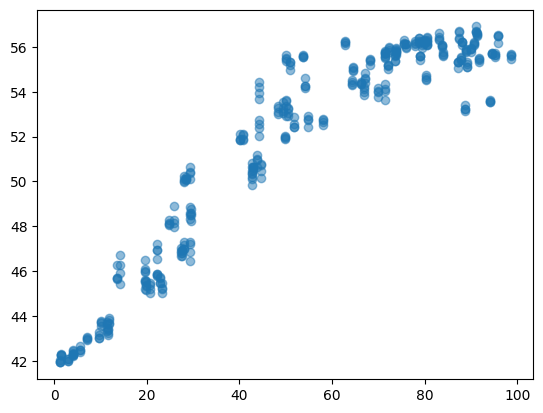

In [2]:
from torch.utils.data import DataLoader
from pytorch_lightning import Trainer
from generators.poisson_process_generator import PoissonProcessDataset
from models.vanilla_transformer import TransformerModel
from probes.linear_probe import LinearProbe
import matplotlib.pyplot as plt

# Probe Evaluation Loop
if __name__ == "__main__":
    # Path to the pre-trained model checkpoint (from previous training loop)
    checkpoint_path = "/home/wojciech/private/magisterka/TFTS/training/lightning_logs/version_8/checkpoints/transformer-epoch=154-val_loss=0.06.ckpt"

    # Load the trained model
    model = TransformerModel.load_from_checkpoint(checkpoint_path)

    # Create the DataLoader for evaluation
    val_loader = PoissonProcessDataset(batch_size=16, series_length=1000, subseries_length=50, stride=50, intensity_count=100).get_dataloader()

    # Initialize the linear probe with the transformer model
    probe = LinearProbe(model_path=checkpoint_path, input_dim=128)  # Assuming `d_model` is 128
    # Fine-tune the linear probe using the training data (optional)
    # If needed, create a train_loader like val_loader and call finetune
    train_loader = PoissonProcessDataset(batch_size=16, series_length=1000, subseries_length=50, stride=50, intensity_count=1000).get_dataloader()
    probe.finetune(train_loader, num_epochs=20)

    # Evaluate the probe on the validation dataset
    val_loss, predictions, labels = probe.evaluate(val_loader)
    plt.scatter(labels, predictions, alpha=0.5)
    print(f"Validation Loss (MSE): {val_loss:.4f}")


In [ ]:
labels